# The relation between the number of street condition complaints and the number of motor vehicle collisions

In [227]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
import os
import pysal
import geopandas as gp
import shapely
plt.style.use('seaborn-darkgrid')
from __future__ import print_function

In [3]:
df=pd.read_csv('/Users/andrewchen/andrew95/civic/311.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32557686,01/28/2016 09:10:41 PM,07/12/2017 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11234,2265 EAST 73 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618142,-73.903087,"(40.61814186182378, -73.90308738267184)"
1,34659144,10/29/2016 05:47:31 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,NaN,11209,377 91ST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.619403,-74.030168,"(40.61940293176556, -74.0301675656847)"
2,34794499,11/16/2016 09:18:41 AM,08/29/2017 04:00:36 PM,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Dead Branches in Tree,Street,11233,435 MACDONOUGH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682789,-73.928326,"(40.68278904124685, -73.92832583586899)"
3,32641711,02/10/2016 10:16:49 AM,07/12/2017 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11234,1445 EAST 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618846,-73.919126,"(40.61884595249581, -73.91912637423376)"
4,32483202,01/22/2016 11:27:39 AM,07/12/2017 12:00:00 AM,DOB,Department of Buildings,Building/Use,No Certificate Of Occupancy/Illegal/Contrary T...,NaN,11236,952 EAST 105 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.646570,-73.893630,"(40.646569526609674, -73.89362997275256)"


In [31]:
df[df['Agency Name']=='Department of Transportation']['Complaint Type'].value_counts()

Street Condition              24269
Street Light Condition        16038
Traffic Signal Condition       9033
Broken Muni Meter              5717
Sidewalk Condition             2162
Street Sign - Damaged          1810
Street Sign - Missing          1458
Curb Condition                  730
Street Sign - Dangling          588
Highway Condition               373
Broken Parking Meter            225
Bike Rack Condition              61
Bus Stop Shelter Placement       51
Bridge Condition                 45
Municipal Parking Facility       15
Public Toilet                    14
Name: Complaint Type, dtype: int64

In [38]:
df1=df[df['Complaint Type'] == 'Street Condition']

In [39]:
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
6,33598596,06/14/2016 02:56:45 PM,NaN,DOT,Department of Transportation,Street Condition,Wear & Tear,NaN,11209,78 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.627943,-74.024760,"(40.62794326801825, -74.0247603832592)"
111,32308333,01/01/2016 12:31:14 AM,01/06/2016 01:07:05 PM,DOT,Department of Transportation,Street Condition,Cave-in,Street,11219,5417 13 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.632134,-73.995122,"(40.632134378632045, -73.99512182977598)"
195,32311009,01/01/2016 04:55:40 PM,01/03/2016 08:30:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11219,1365 63 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.626343,-73.998973,"(40.626342972405155, -73.99897329551378)"
237,32311014,01/01/2016 12:28:45 PM,01/05/2016 09:50:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11221,600 JEFFERSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685120,-73.934017,"(40.68512001247442, -73.93401664917462)"
238,32311017,01/01/2016 10:20:36 AM,01/05/2016 08:40:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,11236,10001 FLATLANDS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.645242,-73.898241,"(40.64524247775999, -73.89824095823822)"


In [158]:
df2=[]
df2=pd.DataFrame(df1[['Created Date','Incident Zip','Latitude','Longitude']])[pd.notnull(df1['Incident Zip'])]
df2['Incident Zip']=df2['Incident Zip'].astype(int)
df2.head()

,Created Date,Incident Zip,Latitude,Longitude
6,06/14/2016 02:56:45 PM,11209,40.627943,-74.024760
111,01/01/2016 12:31:14 AM,11219,40.632134,-73.995122
195,01/01/2016 04:55:40 PM,11219,40.626343,-73.998973
237,01/01/2016 12:28:45 PM,11221,40.685120,-73.934017
238,01/01/2016 10:20:36 AM,11236,40.645242,-73.898241


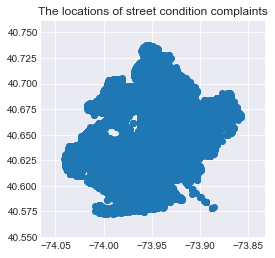

In [216]:
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.add_subplot(111)
ax.scatter(df2.Longitude, df2.Latitude)
ax.set_title("The locations of street condition complaints")

In [83]:
motor=pd.read_csv('/Users/andrewchen/andrew95/civic/motor.csv')

In [84]:
motor.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2016,9:50,BROOKLYN,11230.0,40.611953,-73.968165,"(40.6119531, -73.9681646)",OCEAN PARKWAY,AVENUE O,NaN,...,Unspecified,NaN,NaN,NaN,3365311,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
1,01/01/2016,9:45,NaN,NaN,40.650277,-74.011747,"(40.6502769, -74.0117472)",NaN,NaN,NaN,...,Outside Car Distraction,Outside Car Distraction,Failure to Yield Right-of-Way,NaN,3363795,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN
2,01/01/2016,9:45,BROOKLYN,11207.0,40.661835,-73.893105,"(40.6618355, -73.8931046)",PENNSYLVANIA AVENUE,NEW LOTS AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3363804,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,01/01/2016,9:45,BRONX,10461.0,40.854469,-73.833906,"(40.8544685, -73.8339058)",HUTCHINSON RIVER PARKWAY EAST,MAYFLOWER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3363435,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
4,01/01/2016,9:42,BROOKLYN,11233.0,40.676131,-73.921901,"(40.6761315, -73.9219014)",PACIFIC STREET,RALPH AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3363823,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [154]:
motor2=[]
motor2=pd.DataFrame(motor[['DATE','ZIP CODE','LATITUDE','LONGITUDE']])[pd.notnull(motor['ZIP CODE'])]

In [156]:
motor2['ZIP CODE']=motor2['ZIP CODE'].astype(int)
motor2.head()

,DATE,ZIP CODE,LATITUDE,LONGITUDE
0,01/01/2016,11230,40.611953,-73.968165
2,01/01/2016,11207,40.661835,-73.893105
3,01/01/2016,10461,40.854469,-73.833906
4,01/01/2016,11233,40.676131,-73.921901
5,01/01/2016,11358,40.761408,-73.803845


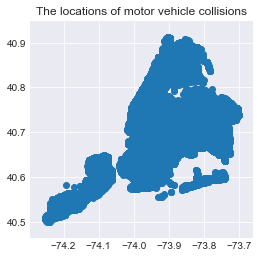

In [217]:
fig1 = plt.figure(figsize=plt.figaspect(1))
ax = fig1.add_subplot(111)
ax.scatter(motor2.LONGITUDE, motor2.LATITUDE)
ax.set_title("The locations of motor vehicle collisions")

In [160]:
m=pd.Series.to_dict(motor2['ZIP CODE'].value_counts())
s=pd.Series.to_dict(df2['Incident Zip'].value_counts())

In [189]:
slist=list(s.keys())

In [191]:
street=[]
zipcode=[]
mvc=[]
for i in slist:
    zipcode.append(i)
    street.append(s[i])
    mvc.append(m[i])

In [200]:
cor=pd.DataFrame([zipcode,street,mvc])

In [202]:
cor=np.transpose(cor)

In [249]:
cor.head()

,0,1,2
0,11414,1,478
1,11201,979,1996
2,11203,646,1937
3,11204,595,1091
4,11205,408,931


In [237]:
print("The mean, median and standard deviation of street condition complaints number are %.2f, %.2f and %.2f."%(cor[1].mean(), cor[1].median(),cor[1].std()))
print("The mean, median and standard deviation of motor vehicle collisions number are %.2f, %.2f and %.2f."%(cor[2].mean(), cor[2].median(),cor[2].std()))



The mean, median and standard deviation of street condition complaints number are 591.93, 588.00 and 289.98.
The mean, median and standard deviation of motor vehicle collisions number are 1221.51, 1206.00 and 526.72.


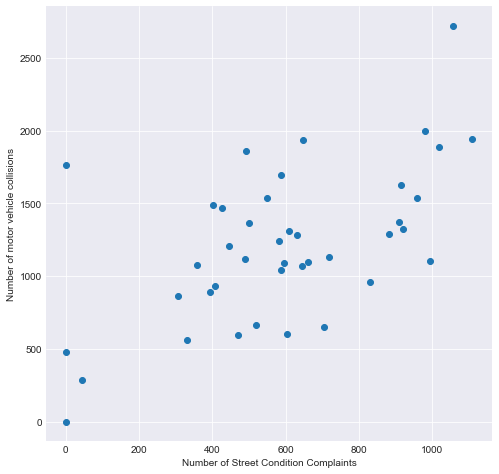

In [207]:
plt.figure(figsize=(8,8))
plt.scatter(cor[1],cor[2])
plt.xlabel('Number of Street Condition Complaints')
plt.ylabel('Number of motor vehicle collisions')

In [214]:
np.corrcoef(cor[1],cor[2])[1][0]

0.58256111945157685

In [208]:
import statsmodels.formula.api as smf

In [246]:
lm1 = smf.ols(formula=' cor[2] ~ cor[1] -1', data = cor).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cor[2]   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     246.6
Date:                Tue, 10 Oct 2017   Prob (F-statistic):           1.06e-18
Time:                        01:17:36   Log-Likelihood:                -312.65
No. Observations:                  41   AIC:                             627.3
Df Residuals:                      40   BIC:                             629.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cor[1]         1.8729      0.119     15.704      0.000       1.632       2.114
==============================================================================
Omnibus:                        9.264   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.858
Skew:                           0.839   Prob(JB):                       0.0119
Kurtosis:                       4.540   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

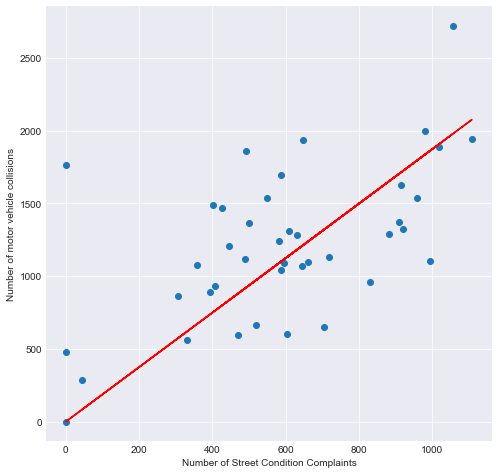

In [247]:
plt.figure(figsize=(8,8))
plt.scatter(cor[1],cor[2])
plt.plot(cor[1], np.dot(1.8729,cor[1]),c="r")
plt.xlabel('Number of Street Condition Complaints')
plt.ylabel('Number of motor vehicle collisions')

The linear model reveals there is a strong positive relation between the number of street condition complaints and the number of motor vehicle collisions. NYPD and Department of Transportation can use this model to assess different areas' traffic safey situations. One of this approach's limitaions is not considering the area of road of each area. An area's number of street condition complaints does not represent the actural street condition because some areas have more roads than others. Further studies can invole a data set of road areas and use the number of street complaints divided by road area as the attribute of street condition. However, the outliers in this model is useful to city agencies. For instance, Ridgewood and Glendale has a low number of street condition complaints but a large number of collisions. Department of Transportation and NYPD can work together to figure out the cause.